In [1]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
log_dir = "adrien"

In [3]:
# Fonction pour charger un json et en faire un DataFrame pandas
def load_metrics(json_path):
    with open(json_path, 'r') as f:
        data = json.load(f)
    epochs = data['epochs']
    df = pd.DataFrame({
        'train_loss': data['train_loss_history'],
        'train_acc': data['train_acc_history'],
        'val_loss': data['val_loss_history'],
        'val_acc': data['val_acc_history'],
    }, index=epochs)
    return df

In [4]:
def parse_folder_info(path):
    # Extrait le nom du dossier parent juste avant all_metrics.json
    folder_name = os.path.basename(os.path.dirname(path))
    parts = folder_name.split('_')

    model = parts[0]
    # Si on a juste model + none + timestamp
    if len(parts) == 3 and parts[1].lower() == "none":
        return model, "None", None, None

    # Sinon on suppose : model_noisePosition_noiseType_noiseMagnitude_timestamp
    if len(parts) >= 5:
        noise_position = parts[1]
        noise_type = parts[2]
        noise_magnitude = parts[3]
        return model, noise_position, noise_type, noise_magnitude

    # Fallback si format inattendu
    return model, None, None, None


In [5]:
# Trouver tous les fichiers all_metrics.json sous log_dir
def get_all_json(log_dir_name):
    json_files = []
    for root, dirs, files in os.walk(log_dir_name):
        for file in files:
            if file == "all_metrics.json":
                json_files.append(os.path.join(root, file))

    return json_files

In [6]:
def plot_all_json(json_files_names):
    for json_path in json_files_names:
        model, noise_pos, noise_type, noise_mag = parse_folder_info(json_path)
        df = load_metrics(json_path)

        print(f"File: {json_path}")
        print(f"  model : {model}")
        if noise_pos == "None":
            print(f"  noise : None")
        else:
            print(f"  noise position : {noise_pos}")
            print(f"  noise type : {noise_type}")
            print(f"  noise magnitude : {noise_mag}")

        print(f"  Final Train Accuracy: {df['train_acc'].iloc[-1]:.4f}")
        print(f"  Final Val Accuracy:   {df['val_acc'].iloc[-1]:.4f}")
        print()

        plt.figure(figsize=(12,5))
        plt.subplot(1, 2, 1)
        df[['train_loss', 'val_loss']].plot(marker='o', grid=True, ax=plt.gca())
        plt.title("Loss")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")

        plt.subplot(1, 2, 2)
        ax = plt.gca()
        df[['train_acc', 'val_acc']].plot(marker='o', grid=True, ax=ax)
        plt.title("Accuracy")
        plt.xlabel("Epoch")
        plt.ylabel("Accuracy")
        ax.set_ylim(0, 1)
        ax.set_yticks(np.linspace(0, 1, 11))

        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()


File: adrien/resnet18_none_20250515_094307/all_metrics.json
  model : resnet18
  noise position : None
  noise type : None
  noise magnitude : None
  Final Train Accuracy: 0.9909
  Final Val Accuracy:   0.9270



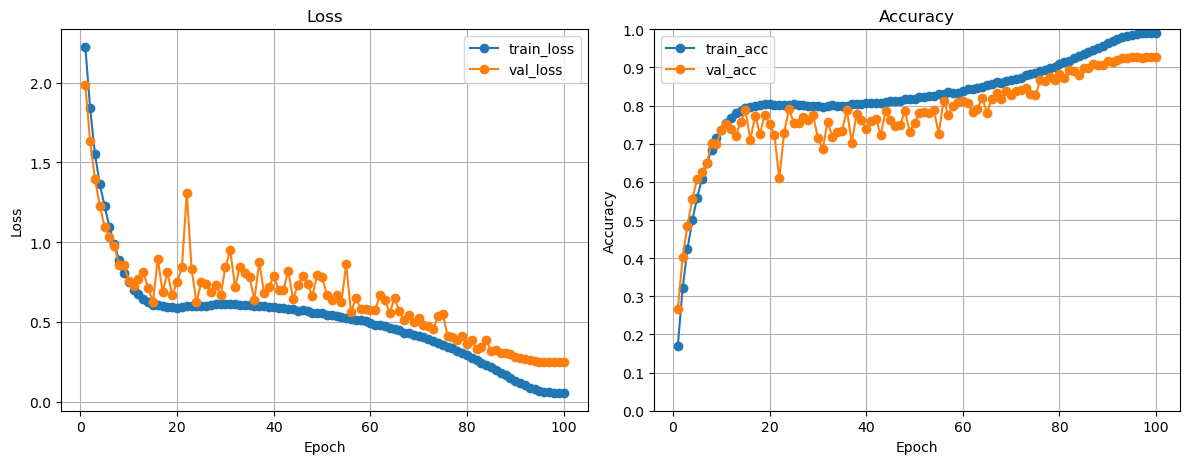

File: adrien/resnet18_gradient_gaussian_0.05_20250515_115738/all_metrics.json
  model : resnet18
  noise position : gradient
  noise type : gaussian
  noise magnitude : 0.05
  Final Train Accuracy: 0.7600
  Final Val Accuracy:   0.7560



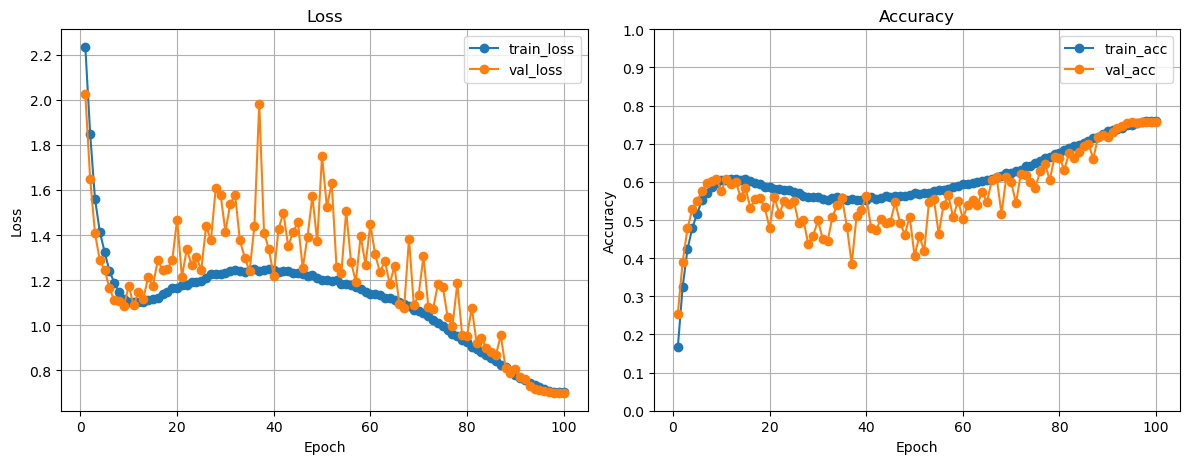

File: adrien/resnet18_gradient_gaussian_0.01_20250515_101522/all_metrics.json
  model : resnet18
  noise position : gradient
  noise type : gaussian
  noise magnitude : 0.01
  Final Train Accuracy: 0.9454
  Final Val Accuracy:   0.9051



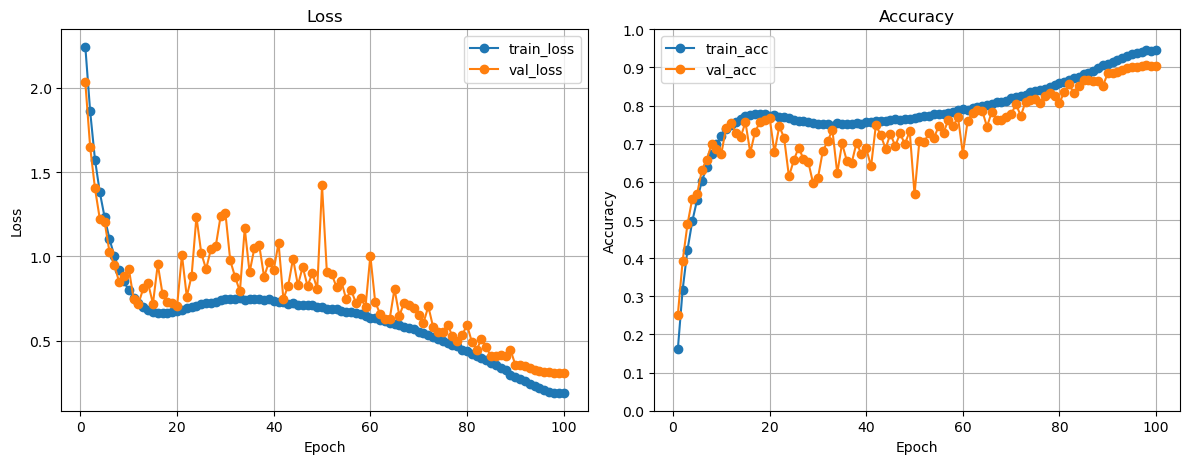

In [7]:
plot_all_json(get_all_json(log_dir))

File: 01Test/checkpoints01/metrics/resnet18_gradient_gaussian_0.05_20250516_020339/all_metrics.json
  model : resnet18
  noise position : gradient
  noise type : gaussian
  noise magnitude : 0.05
  Final Train Accuracy: 0.5751
  Final Val Accuracy:   0.5470



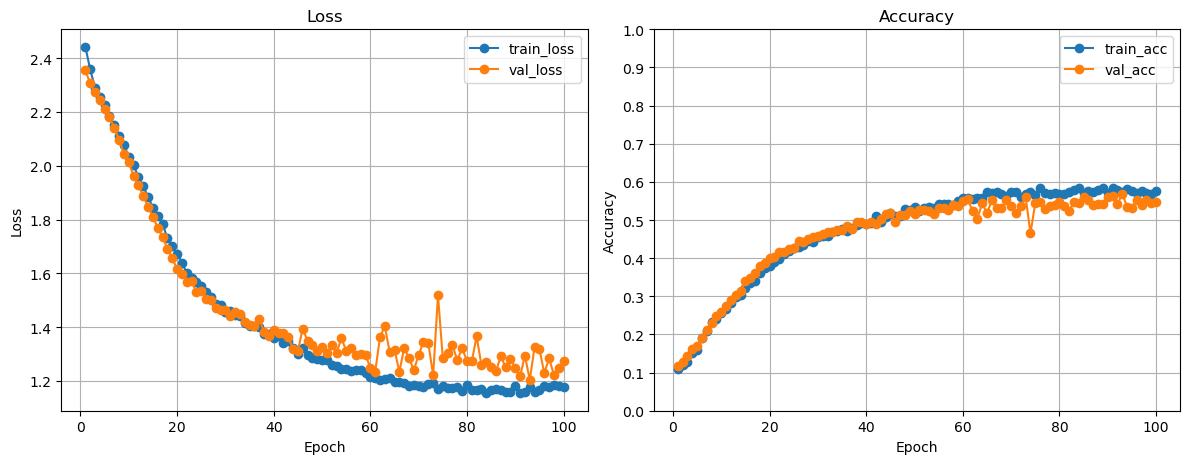

File: 01Test/checkpoints01/metrics/resnet18_gradient_gaussian_0.01_20250516_020003/all_metrics.json
  model : resnet18
  noise position : gradient
  noise type : gaussian
  noise magnitude : 0.01
  Final Train Accuracy: 0.8375
  Final Val Accuracy:   0.6120



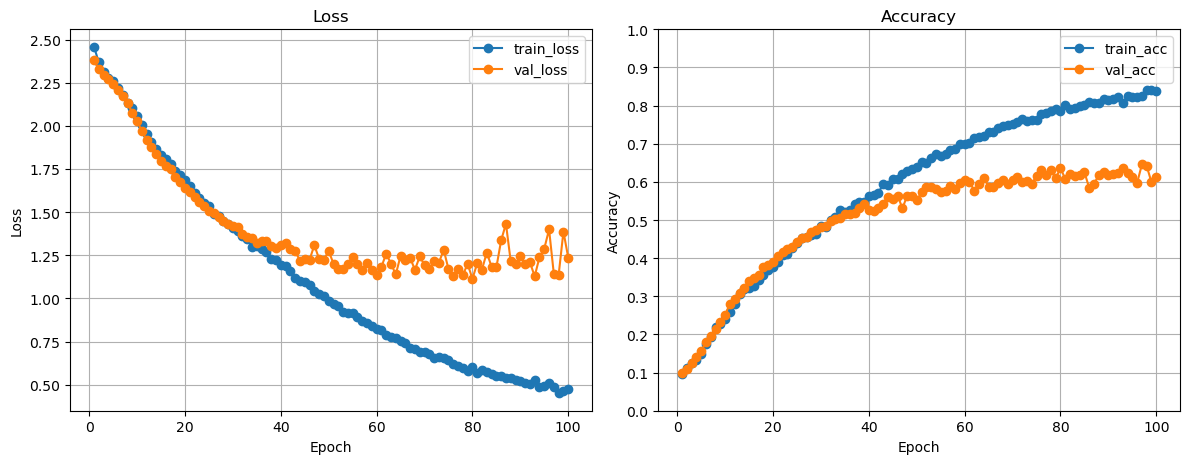

File: 01Test/checkpoints01/metrics/resnet18_gradient_uniform_0.03_20250516_020714/all_metrics.json
  model : resnet18
  noise position : gradient
  noise type : uniform
  noise magnitude : 0.03
  Final Train Accuracy: 0.6911
  Final Val Accuracy:   0.5879



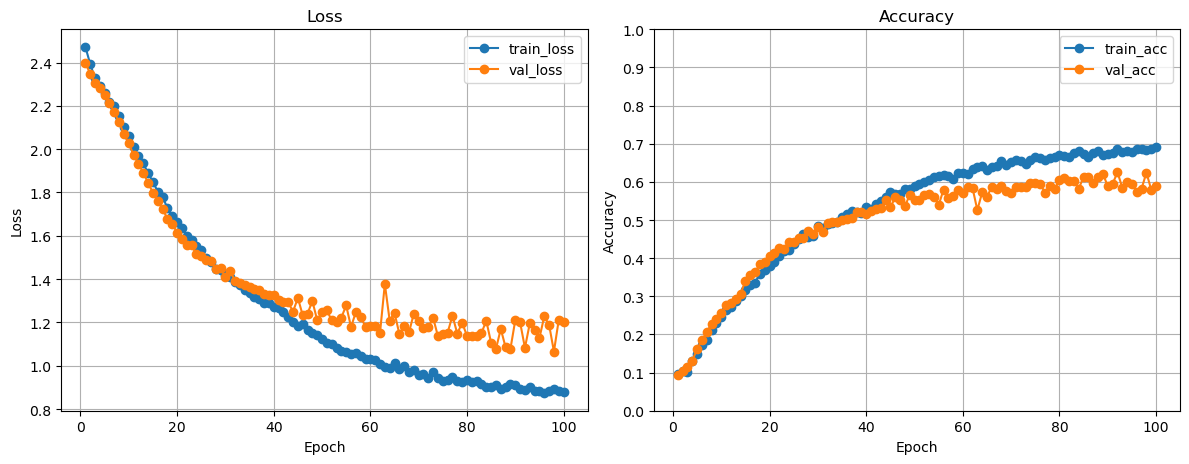

File: 01Test/checkpoints01/metrics/resnet18_none_20250516_015712/all_metrics.json
  model : resnet18
  noise position : None
  noise type : None
  noise magnitude : None
  Final Train Accuracy: 0.8894
  Final Val Accuracy:   0.6330



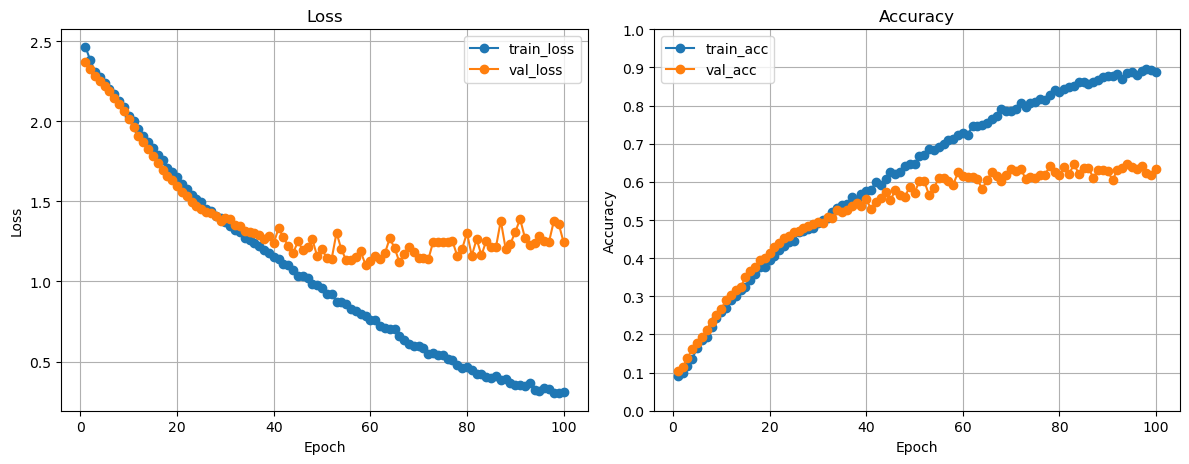

File: 01Test/checkpoints01/metrics/resnet18_weight_gaussian_0.01_20250516_021042/all_metrics.json
  model : resnet18
  noise position : weight
  noise type : gaussian
  noise magnitude : 0.01
  Final Train Accuracy: 0.2198
  Final Val Accuracy:   0.2293



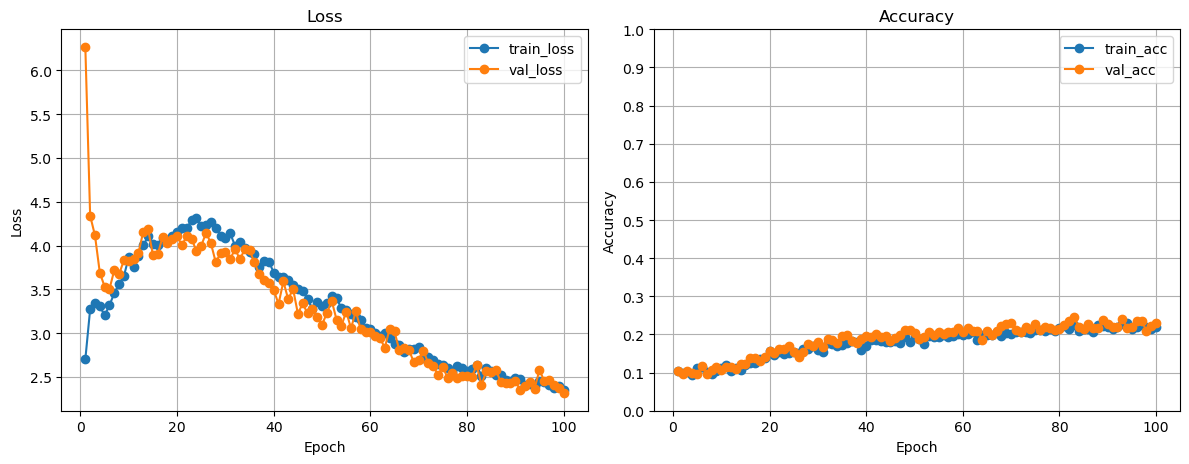

In [8]:
log_dir = "01Test/checkpoints01/metrics"
plot_all_json(get_all_json(log_dir))

File: 1Test/checkpoints1/metrics/resnet18_gradient_uniform_0.03_20250516_032952/all_metrics.json
  model : resnet18
  noise position : gradient
  noise type : uniform
  noise magnitude : 0.03
  Final Train Accuracy: 0.8059
  Final Val Accuracy:   0.8026



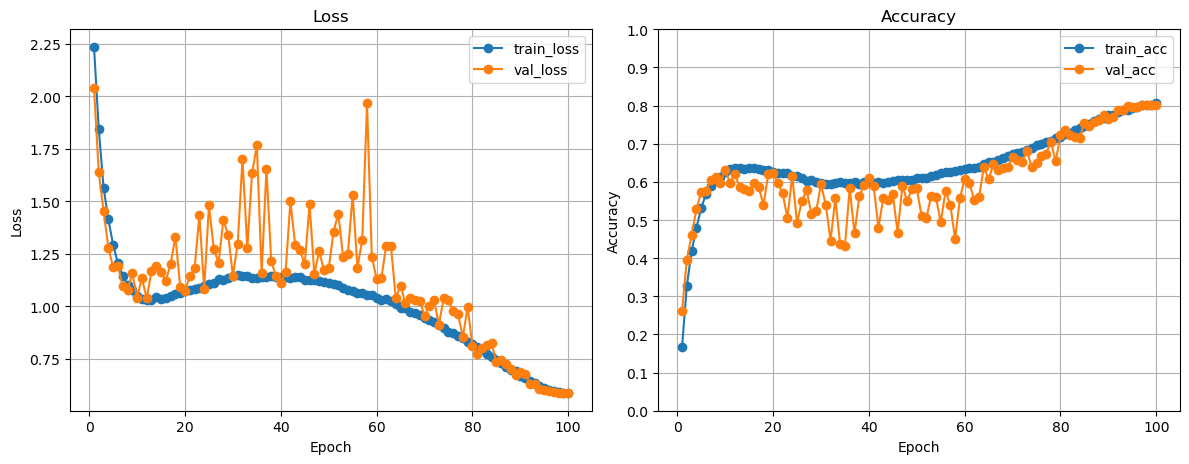

File: 1Test/checkpoints1/metrics/resnet18_gradient_gaussian_0.01_20250516_023955/all_metrics.json
  model : resnet18
  noise position : gradient
  noise type : gaussian
  noise magnitude : 0.01
  Final Train Accuracy: 0.9158
  Final Val Accuracy:   0.8852



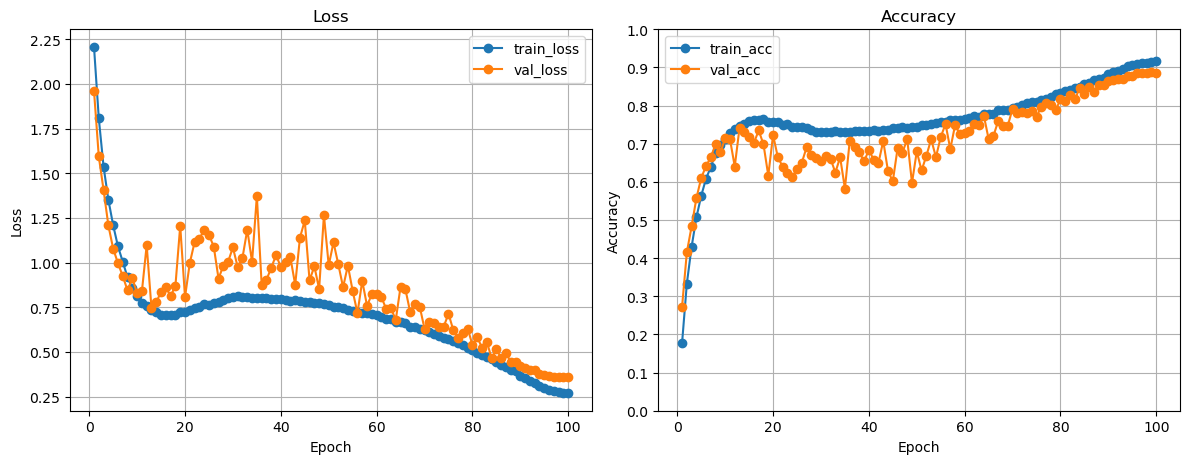

File: 1Test/checkpoints1/metrics/resnet18_none_20250516_022602/all_metrics.json
  model : resnet18
  noise position : None
  noise type : None
  noise magnitude : None
  Final Train Accuracy: 0.9902
  Final Val Accuracy:   0.9285



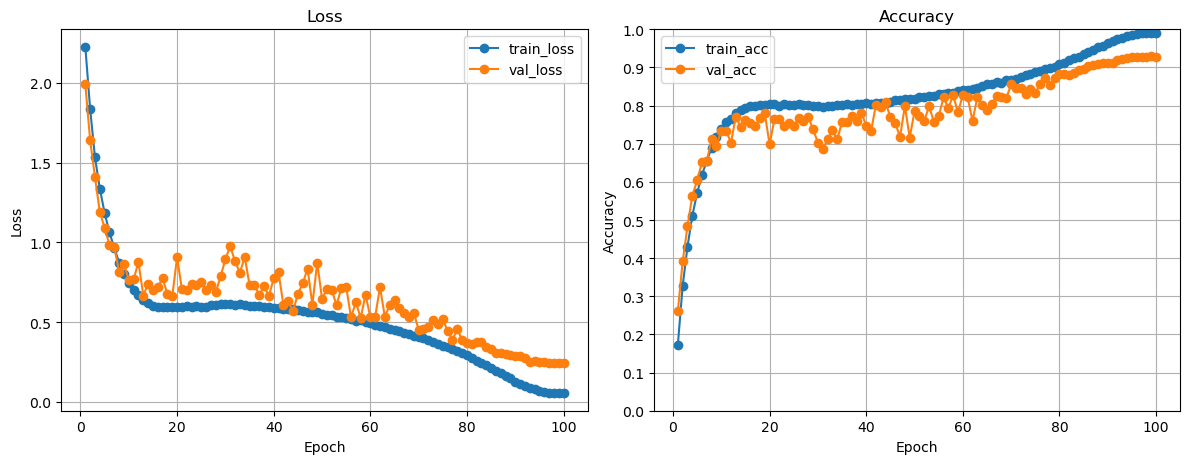

File: 1Test/checkpoints1/metrics/resnet18_gradient_gaussian_0.05_20250516_030456/all_metrics.json
  model : resnet18
  noise position : gradient
  noise type : gaussian
  noise magnitude : 0.05
  Final Train Accuracy: 0.6937
  Final Val Accuracy:   0.6950



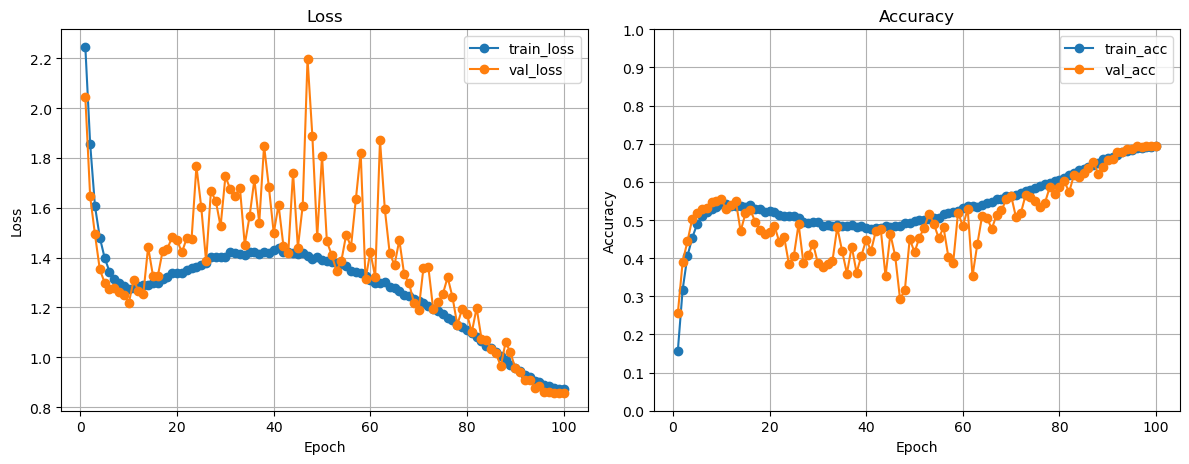

In [9]:
log_dir = "1Test/checkpoints1/metrics"
plot_all_json(get_all_json(log_dir))